<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Replicating-Cutting" data-toc-modified-id="Replicating-Cutting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Replicating Cutting</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-movies-by-year" data-toc-modified-id="Distribution-of-movies-by-year-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Distribution of movies by year</a></span></li><li><span><a href="#Shot-Duration" data-toc-modified-id="Shot-Duration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Shot Duration</a></span><ul class="toc-item"><li><span><a href="#Average-Shot-Duration-Over-the-Years" data-toc-modified-id="Average-Shot-Duration-Over-the-Years-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Average Shot Duration Over the Years</a></span></li><li><span><a href="#Changes-in-Shot-Duration-Within-Movies-(Narrative-Structure)" data-toc-modified-id="Changes-in-Shot-Duration-Within-Movies-(Narrative-Structure)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Changes in Shot Duration Within Movies (Narrative Structure)</a></span></li></ul></li><li><span><a href="#Shot-Scale" data-toc-modified-id="Shot-Scale-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Shot Scale</a></span><ul class="toc-item"><li><span><a href="#Changes-in-shot-scale-over-time" data-toc-modified-id="Changes-in-shot-scale-over-time-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Changes in shot scale over time</a></span></li><li><span><a href="#More-Changes-in-Shot-Scale-over-time" data-toc-modified-id="More-Changes-in-Shot-Scale-over-time-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>More Changes in Shot Scale over time</a></span></li><li><span><a href="#Relationship-between-shot-duration-and-shot-scale" data-toc-modified-id="Relationship-between-shot-duration-and-shot-scale-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Relationship between shot duration and shot scale</a></span></li></ul></li><li><span><a href="#Brightness" data-toc-modified-id="Brightness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Brightness</a></span><ul class="toc-item"><li><span><a href="#Changes-in-brightness-over-the-years" data-toc-modified-id="Changes-in-brightness-over-the-years-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Changes in brightness over the years</a></span></li><li><span><a href="#Changes-in-brightness-within-movies-(narrative-structure)" data-toc-modified-id="Changes-in-brightness-within-movies-(narrative-structure)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Changes in brightness within movies (narrative structure)</a></span></li></ul></li><li><span><a href="#Saturation" data-toc-modified-id="Saturation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Saturation</a></span><ul class="toc-item"><li><span><a href="#Changes-in-saturation-over-the-years" data-toc-modified-id="Changes-in-saturation-over-the-years-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Changes in saturation over the years</a></span></li><li><span><a href="#Changes-in-saturation-within-movies-(narrative-structure?)" data-toc-modified-id="Changes-in-saturation-within-movies-(narrative-structure?)-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Changes in saturation within movies (narrative structure?)</a></span></li></ul></li><li><span><a href="#Mean-Number-of-People" data-toc-modified-id="Mean-Number-of-People-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Mean Number of People</a></span><ul class="toc-item"><li><span><a href="#Mean-number-of-people-per-frame-over-the-years" data-toc-modified-id="Mean-number-of-people-per-frame-over-the-years-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Mean number of people per frame over the years</a></span></li><li><span><a href="#Distribution-of-number-of-people-per-frame" data-toc-modified-id="Distribution-of-number-of-people-per-frame-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Distribution of number of people per frame</a></span></li></ul></li><li><span><a href="#Number-of-people-in-a-shot-vs-shot-duration" data-toc-modified-id="Number-of-people-in-a-shot-vs-shot-duration-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Number of people in a shot vs shot duration</a></span></li></ul></li></ul></div>

In [1]:
from query.models import Video, Shot, Labeler, Face, PoseMeta
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from django.db.models import Avg
from tqdm import tqdm
import rekall
from rekall.video_interval_collection import VideoIntervalCollection
from rekall.interval_list import IntervalList
from rekall.merge_ops import payload_plus
from rekall.temporal_predicates import overlaps, equal

# Replicating Cutting

In this notebook we'll be replicating some of James Cutting's findings (primarily about shot duration, and eventually shot scale) on our dataset.

Right now this notebook has the following graphs:
* Distribution of our movies by year
* Average shot duration of movies by year
* Average shot duration **within** a movie
* Average number of people per frame in movie by year
* Distribution of number of people in frames, split into two buckets

## Distribution of movies by year
Let's first find out what the distribution of our movies across time is.

In [2]:
all_videos = Video.objects.filter(decode_errors=False).order_by('id').all()

In [3]:
print('Number of videos: ', all_videos.count())

Number of videos:  633


In [4]:
release_years = sorted([video.year for video in all_videos])

In [5]:
print('Release year range: {}-{}'.format(release_years[0], release_years[-1]))

Release year range: 1915-2016


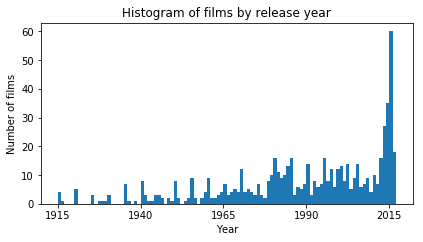

bins: [1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


In [15]:
# Plot histogram of release years
def hist(data, n_bins, label, title, filename=None):
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
#     fig.set_size_inches(3.333, 1.665)
    ret = ax.hist(data, n_bins, histtype='bar', label=[label])
    #ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of films')
    ax.set_xticks(range(1915, 2016, 25))
    ax.set_title(title)
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    
    return ret
_, bins, _ = hist(
    release_years,
    range(release_years[0], release_years[-1] + 2),
    'Number of films',
    'Histogram of films by release year',
    filename='film_release_years.pdf'
)

print('bins:', bins)

In [22]:
Video.objects.filter(year=2015).count()

61

## Shot Duration

### Average Shot Duration Over the Years
Now let's plot the average shot duration over time.

In [12]:
def average_shot_duration(video):
    return Shot.objects.filter(
        video_id=video.id, labeler=Labeler.objects.get(name='shot-hsvhist-face')
    ).all().aggregate(
        avg_duration=Avg(F('max_frame') - F('min_frame'))
    )['avg_duration'] / video.fps

videos_with_avg_shot_duration = [
    (video, average_shot_duration(video))
    for video in tqdm(all_videos)
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:03<00:00, 183.44it/s]


In [24]:
def plot_shot_durations_by_year(videos_with_avg_shot_duration, min_year=None, filename=None):
    data = sorted([(v.year, shot_duration) for v, shot_duration in videos_with_avg_shot_duration])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    x = [d[0] for d in data]
    y = [d[1] for d in data]
    
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
    fig.set_size_inches(6.666, 3.333)
    ax.set_xticks(range(1915, 2016, 25))
    ax.scatter(x, y, s=3)
    ax.set_ylim(0, 20)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Shot Duration (seconds)')
    ax.set_title('Average shot durations over time')
    
    #ax.set_yscale('symlog')
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)))
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    if filename is not None:
        plt.savefig(filename)
    plt.show()

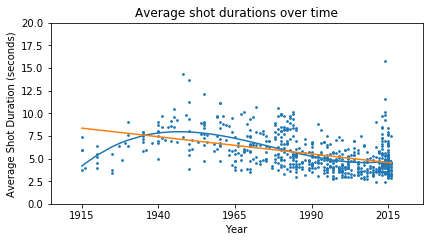

In [25]:
plot_shot_durations_by_year(videos_with_avg_shot_duration, filename="film_shot_duration_over_time.pdf")
#plot_shot_durations_by_year(videos_with_avg_shot_duration, min_year=1930)

In [10]:
# What are the movies with really long shot lengths in the 2010's?
sorted([
    (v.title, v.year, avg_duration)
    for v, avg_duration in videos_with_avg_shot_duration if v.year >= 2010 and avg_duration > 8
], key=lambda tup: (tup[1], tup[0], tup[2]))

[('Coriolanus', 2011, 9.008332889539526),
 ('12 Years a Slave', 2013, 9.680665358293066),
 ('Enemy', 2013, 8.489571273326995),
 ('Gravity', 2013, 8.394914090674902),
 ('A Most Violent Year', 2014, 9.223470447145937),
 ('Birdman or (The Unexpected Virtue of Ignorance)', 2014, 15.723031112334786),
 ('Citizenfour', 2014, 9.784305555555546),
 ('Cymbeline', 2014, 10.105688627061879),
 ('Jauja', 2014, 11.608451547284428),
 ('The Revenant', 2015, 8.379867438279344)]

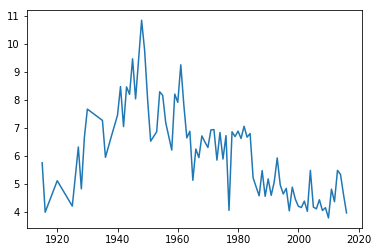

In [11]:
# Plot moving average of average shot duration
avg_shot_durations_by_year = IntervalList([
    (video.year, video.year, [shot_duration])
    for video, shot_duration in videos_with_avg_shot_duration
]).coalesce(payload_merge_op=payload_plus).map(
    lambda intrvl: (intrvl.start, intrvl.end,
        {'avg': np.mean(intrvl.payload), 'std': np.std(intrvl.payload)})
)
data = [
    (intrvl.get_start(), intrvl.get_payload()['avg'], intrvl.get_payload()['std'])
    for intrvl in avg_shot_durations_by_year.get_intervals()
]
ax = plt.gca()
ax.plot([d[0] for d in data], [d[1] for d in data])

### Changes in Shot Duration Within Movies (Narrative Structure)
How do shot durations differ within movies?

Methodology: bucket shot boundaries into 100 bins per movie. Get a normalized count of number of shot transitions per bin by dividing the number of shot boundaries by the total **number of shots** in the movie. Take the average of this number across all films. Then "scale this number back up to seconds" by ???. Not clear from the Cutting methodology.

In [41]:
def compute_shot_durations_per_bin(videos):
    bucket_proportions = [[] for i in range(0, 100)]
    
    average_shot_duration_data = 0.
    total_num_shots = 0.
    
    for video in tqdm(videos):
        # Get all the shots, removing the first and last one to get rid of boundaries at 0 and at the end
        shots = list(Shot.objects.filter(
            video_id=video.id,
            labeler=Labeler.objects.get(name='shot-hsvhist-face')
        ).order_by('min_frame').all())[1:-1]
        num_shots = len(shots)

        divider = video.num_frames / 100.
        bin_num = 0

        num_boundaries_in_bin = 0.
        for shot in shots:
            if shot.min_frame < (bin_num + 1.) * divider:
                num_boundaries_in_bin += 1
            else:
                bucket_proportions[bin_num].append(num_boundaries_in_bin / num_shots)
                bin_num += 1
                num_boundaries_in_bin = 1.
        bucket_proportions[bin_num].append(num_boundaries_in_bin / num_shots)
        
        avg_duration = average_shot_duration(video)
        average_shot_duration_data += avg_duration * num_shots
        total_num_shots += num_shots
    
    normalized_shots_per_bin = [
        np.mean(proportions)
        for proportions in bucket_proportions
    ]
        
    average_shot_duration_data /= total_num_shots
    
    shot_lengths_per_bin = [
        ((1. / 100.) / shot_proportion) * average_shot_duration_data
        for shot_proportion in normalized_shots_per_bin
    ]
    
    return shot_lengths_per_bin

In [77]:
def plot_shot_lengths_per_bin(data, title, polynomial_degree=6, filename=None):
    x = [(i + 0.5) / 100. for i in range(0, 100)]
    y = data
    
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
    fig.set_size_inches(6.666, 3.333)
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Proportion of movie')
    ax.set_ylabel('Average Shot Duration (seconds)')
    ax.set_title(title)
    ax.set_xlim(0, 1)
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polynomial_degree))(np.unique(x)))
    
    ax.axvline(x=0.25, color='k')
    ax.axvline(x=0.5, color='k')
    ax.axvline(x=0.75, color='k')
    
    ax.text(x=0.09, y=6.2, s='Setup')
    ax.text(x=0.29, y=6.2, s='Complication')
    ax.text(x=0.54, y=6.2, s='Development')
    ax.text(x=0.83, y=6.2, s='Climax')
    
    if filename is not None:
        plt.savefig(filename)
    
    plt.show()

In [42]:
shot_lengths_all_videos = compute_shot_durations_per_bin(all_videos)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:14<00:00, 44.54it/s]


In [15]:
shot_lengths_1915_to_1959 = compute_shot_durations_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1915,
        year__lte=1959
    ).order_by('id').all()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:01<00:00, 56.50it/s]


In [23]:
shot_lengths_1960_to_1985 = compute_shot_durations_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1960,
        year__lte=1985
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:04<00:00, 35.72it/s]


In [24]:
shot_lengths_1986_to_2016 = compute_shot_durations_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1986,
        year__lte=2016
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [00:11<00:00, 33.14it/s]


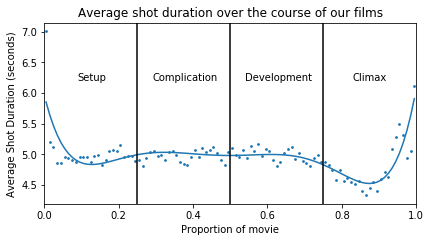

In [78]:
plot_shot_lengths_per_bin(
    shot_lengths_all_videos,
    'Average shot duration over the course of our films',
    polynomial_degree=6,
    filename='shot_durations_over_course_of_films.pdf'
)

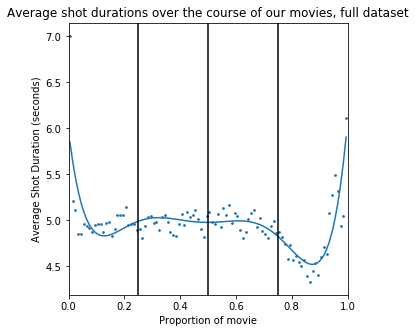

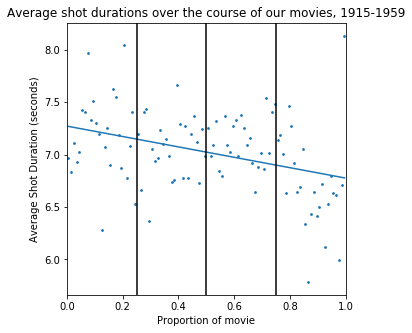

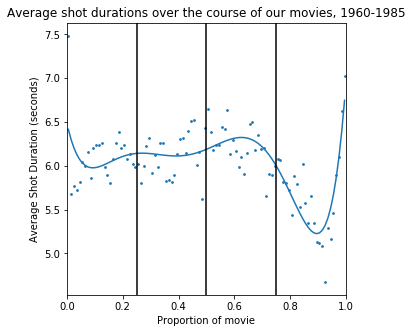

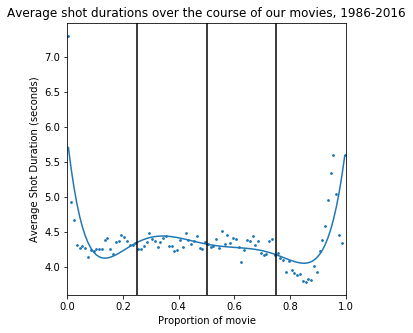

In [25]:
plot_shot_lengths_per_bin(
    shot_lengths_all_videos,
    'Average shot durations over the course of our movies, full dataset',
    polynomial_degree=6
)
plot_shot_lengths_per_bin(
    shot_lengths_1915_to_1959,
    'Average shot durations over the course of our movies, 1915-1959',
    polynomial_degree=1
)
plot_shot_lengths_per_bin(
    shot_lengths_1960_to_1985,
    'Average shot durations over the course of our movies, 1960-1985',
    polynomial_degree=6
)
plot_shot_lengths_per_bin(
    shot_lengths_1986_to_2016,
    'Average shot durations over the course of our movies, 1986-2016',
    polynomial_degree=6
)

## Shot Scale
We want to find out whether shot scale has changed over time, and the relationship between shot duration and shot scale.

### Changes in shot scale over time
For this, we'll just graph the distribution of different shot scales and bucket by different eras.


In [60]:
# This takes about 4 and a half minutes to run!
frames_qs = Frame.objects.annotate(
    numbermod=F('number') % 12
).filter(numbermod=0, video_id__in=all_videos).annotate(
    shot_scale_name=F('shot_scale__name')
).all()
num_frames = frames_qs.count()
shot_scales = VideoIntervalCollection.from_django_qs(
    frames_qs,
    schema={
        "start": "number",
        "end": "number",
        "payload": "shot_scale_name"
    },
    progress=True,
    total=num_frames
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8251341/8251341 [02:42<00:00, 50665.49it/s]


In [27]:
def distribution_of_shot_scales(frames_with_shot_scale):
    labels = ['unknown', 'extreme_long', 'long', 'medium_long', 'medium', 'medium_close_up',
             'close_up', 'extreme_close_up']
    
    shot_scale_proportions = {
        label: 0. for label in labels
    }
    total_videos = 0.
    
    for video_id in list(frames_with_shot_scale.get_allintervals().keys()):
        counts_for_video = {
            label: 0. for label in shot_scale_proportions
        }
        total_frames = 0.
        for intrvl in frames_with_shot_scale.get_intervallist(video_id).get_intervals():
            shot_scale = intrvl.payload
            counts_for_video[shot_scale] += 1
            total_frames += 1
        for label in counts_for_video:
            shot_scale_proportions[label] += counts_for_video[label] / total_frames
        total_videos += 1
    
    return labels, [shot_scale_proportions[label] / total_videos for label in labels]

In [28]:
def graph_shot_scale_distribution(shot_scale_labels, shot_scale_distributions,
                                               distribution_labels, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    for distribution, label in zip(shot_scale_distributions, distribution_labels):
        x = range(0, len(shot_scale_labels))
        y = distribution
        ax.plot(x, y, label=label)
        
        ax.legend()
        
    ax.set_xlabel('Shot scale')
    ax.set_ylabel('Proportion of frames')
    ax.set_title(title)
    
    plt.xticks(x, shot_scale_labels)
    
    plt.show()

In [29]:
labels, shot_scale_distribution_all_videos = distribution_of_shot_scales(shot_scales)

In [30]:
_, shot_scale_distribution_1915_to_1969 = distribution_of_shot_scales(
    VideoIntervalCollection(
        {
            video_id: shot_scales.get_intervallist(video_id)
            for video_id in list(shot_scales.get_allintervals().keys())
            if Video.objects.get(id=video_id).year <= 1969
        }
    )
)

In [31]:
_, shot_scale_distribution_1970_to_2016 = distribution_of_shot_scales(
    VideoIntervalCollection(
        {
            video_id: shot_scales.get_intervallist(video_id)
            for video_id in list(shot_scales.get_allintervals().keys())
            if Video.objects.get(id=video_id).year >= 1970
        }
    )
)

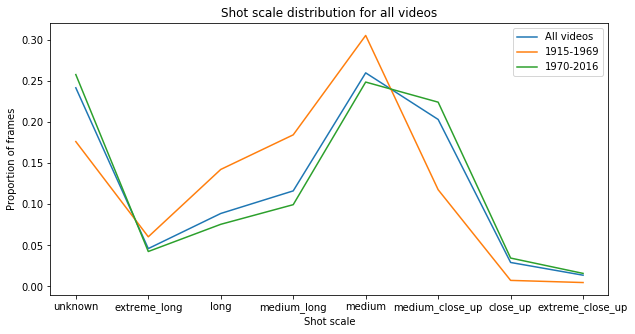

In [32]:
graph_shot_scale_distribution(
    labels, 
    [
        shot_scale_distribution_all_videos,
        shot_scale_distribution_1915_to_1969,
        shot_scale_distribution_1970_to_2016
    ], 
    [
        'All videos',
        '1915-1969',
        '1970-2016'
    ],
    'Shot scale distribution for all videos'
)

### More Changes in Shot Scale over time
Next, We'll graph linear fits of the proportion of different shot scales.

In [64]:
shot_scale_labels = ['unknown', 'extreme_long', 'long', 'medium_long', 'medium', 'medium_close_up',
             'close_up', 'extreme_close_up']

def get_shot_scale_proportions(intervallist, labels):
    counts_for_video = {
        label: 0. for label in labels
    }
    total_frames = 0.
    for intrvl in intervallist.get_intervals():
        shot_scale = intrvl.payload
        counts_for_video[shot_scale] += 1
        total_frames += 1
    for label in counts_for_video:
        counts_for_video[label] = counts_for_video[label] / total_frames
    return counts_for_video

In [23]:
videos_with_shot_scale_proportions = [
    (Video.objects.get(id=video_id),
     get_shot_scale_proportions(shot_scales.get_intervallist(video_id), shot_scale_labels))
    for video_id in tqdm(list(shot_scales.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:04<00:00, 143.12it/s]


In [35]:
def plot_shot_scale_proportions_by_year(videos_with_shot_scale_proportions, labels,
                                        fit_lines_only=False, min_year=None):
    data = sorted([(v.year, shot_scale_proportions) 
                   for v, shot_scale_proportions in videos_with_shot_scale_proportions
                  ],
                  key=lambda year_and_proportions: year_and_proportions[0])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    fig, ax = plt.subplots(figsize=(10, 5))
    
    for i, label in enumerate(labels):
        x = [d[0] for d in data]
        y = [d[1][label] for d in data]
        
        if not fit_lines_only:
            ax.scatter(x, y, s=3, label=label)
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        else:
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label=label)
        
    ax.set_xlabel('Year')
    ax.set_ylabel('Shot scale proportion')
    ax.set_title('Shot scale proportions by year')
    if not fit_lines_only:
        ax.set_ylim(ymax=1)
    ax.legend(loc=(1.04,0))
    
    #ax.set_yscale('symlog')
    plt.show()

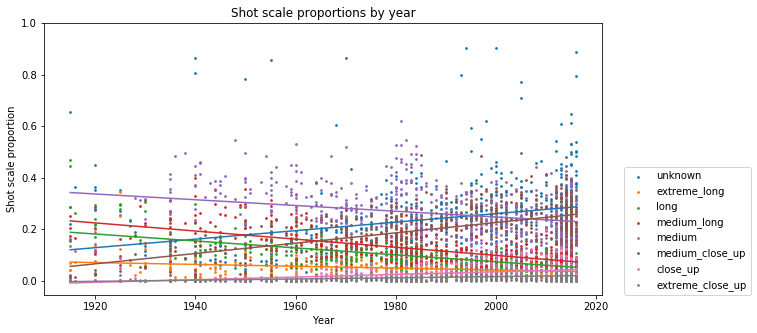

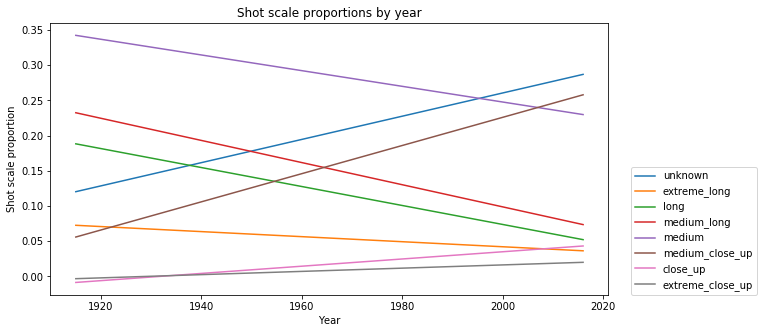

In [36]:
plot_shot_scale_proportions_by_year(videos_with_shot_scale_proportions, shot_scale_labels, fit_lines_only=False)
plot_shot_scale_proportions_by_year(videos_with_shot_scale_proportions, shot_scale_labels, fit_lines_only=True)

In [159]:
def plot_shot_scale_proportions_by_year_separate_graphs(
    videos_with_shot_scale_proportions, labels, fit_lines_only=False, min_year=None,
    filename = None, titles=None
):
    data = sorted([(v.year, shot_scale_proportions) 
                   for v, shot_scale_proportions in videos_with_shot_scale_proportions
                  ],
                  key=lambda year_and_proportions: year_and_proportions[0])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    colors = colors
    
    fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(6.666, 3.333))
    
    for label, color, ax in zip(labels, colors, axs):
        x = [d[0] for d in data]
        y = [d[1][label] for d in data]

        if not fit_lines_only:
            ax.scatter(x, y, s=1, label=label, color=color)
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k', lw=1)
        else:
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label=label, color=color)

        ax.set_xticks([1915, 2015])
        ax.set_xlabel('Year')
        if label == 'unknown' or label == 'extreme_long':
            ax.set_ylabel('Shot scale proportion')
        else:
            ax.set_ylabel('')
        if titles is None:
            ax.set_xlabel('{}'.format(' '.join([w.capitalize() for w in label.split('_')])))
        else:
            ax.set_xlabel(titles[labels.index(label)])
        if label == 'medium':
            ax.set_title('Shot scale proportions over time')
        ax.set_xlim((1905, 2025))
        if label != labels[0]:
            ax.set_ylim(ymax=0.6)
#         ax.legend()
#         plt.tight_layout()
#         if filenames is not None:
#             plt.savefig(filenames[labels.index(label)])
    #fig.suptitle('Shot scale proportions')
    fig.subplots_adjust(wspace=.2)
    #fig.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    
    #ax.set_yscale('symlog')

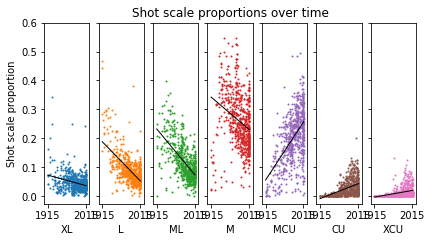

In [160]:
plot_shot_scale_proportions_by_year_separate_graphs(
    videos_with_shot_scale_proportions, 
    shot_scale_labels[1:], 
    fit_lines_only=False,
    filename='shot_proportions.pdf',
    titles=[
        'XL',
        'L',
        'ML',
        'M',
        'MCU',
        'CU',
        'XCU'
    ]
)

### Relationship between shot duration and shot scale
For this, we'll need to assign shots a certain shot scale by looking at the mode for the shot and graph shot duration vs. shot scale.

In [37]:
# First, load all the shots into Rekall
shots_qs = Shot.objects.filter(
    video__in=all_videos,
    labeler=Labeler.objects.get(name='shot-hsvhist-face')
).all()
num_shots = shots_qs.count()
shots = VideoIntervalCollection.from_django_qs(
    shots_qs,
    progress=True,
    total=num_shots
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 874572/874572 [00:08<00:00, 97432.09it/s]


In [61]:
# Next, overlap the shots with per-frame shot scales so that the payload
#   for each shot is a list of all the shot scales in the shot
# Finally, take the mode of the shot scales to get the scale of the whole shot
def get_mode(items):
    return max(set(items), key=items.count)

shots_with_scale = shots.merge(
    shot_scales,
    payload_merge_op=lambda shot_id, frame_shot_scale: [frame_shot_scale],
    predicate=overlaps(),
    working_window=1
).coalesce(
    payload_merge_op=payload_plus
).map(
    lambda shot_interval: (shot_interval.get_start(), shot_interval.get_end(),
                          get_mode(shot_interval.get_payload()))
)

In [62]:
# Compute normalized shot durations for each category of shot
def compute_shot_scale_normalized_duration(shots_with_scale):
    scale_proportions = {label: [] for label in shot_scale_labels}
    
    average_shot_duration_data = 0.
    total_videos = 0.
    
    for video_id in shots_with_scale.get_allintervals():
        scale_proportions_for_video = {label: [] for label in shot_scale_labels}
        
        shots_in_video = shots_with_scale.get_intervallist(video_id)
        
        video = Video.objects.get(id=video_id)
        
        for intrvl in shots_in_video.get_intervals():
            scale_proportions_for_video[intrvl.get_payload()].append(
                intrvl.get_end()-intrvl.get_start()
            )
        
        avg_shot_duration_for_video = float(video.num_frames) / shots_in_video.size()
        
        for label in shot_scale_labels:
            if len(scale_proportions_for_video[label]) > 0:
                scale_proportions[label].append(
                    np.mean(scale_proportions_for_video[label]) / avg_shot_duration_for_video
                )
        
        average_shot_duration_data += avg_shot_duration_for_video / video.fps
        total_videos += 1
    
    average_shot_duration_data /= total_videos
    
    normalized_proportions = [
        np.mean(scale_proportions[label]) * average_shot_duration_data
        for label in shot_scale_labels
    ]
    
    return normalized_proportions

In [74]:
def plot_duration_per_shot_scale(shot_scale_labels, shot_scale_distributions,
                                  distribution_labels, title, filename=None):
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
    for distribution, label in zip(shot_scale_distributions, distribution_labels):
        x = range(0, len(shot_scale_labels))
        y = distribution
        ax.bar(x, y, label=label)
        
        ax.legend()
        
    ax.set_xlabel('Shot scale')
    ax.set_ylabel('Average duration (s)')
    ax.set_title(title)
    
    plt.xticks(x, shot_scale_labels)
    
    if filename is not None:
        plt.savefig(filename)
    
    plt.show()

In [65]:
shot_lengths_per_bin_all_videos = compute_shot_scale_normalized_duration(shots_with_scale)

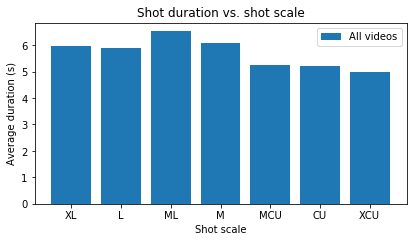

In [76]:
plot_duration_per_shot_scale(
#     [
#         ' '.join([w.capitalize() for w in label.split('_')])
#         for label in shot_scale_labels[1:]
#     ],
    ['XL', 'L', 'ML', 'M', 'MCU', 'CU', 'XCU'],
    [
        shot_lengths_per_bin_all_videos[1:]
    ],
    [
        'All videos'
    ], 'Shot duration vs. shot scale', filename='shot_duration_vs_shot_scale.pdf')

In [42]:
shot_lengths_per_bin_1915_to_1969 = compute_shot_scale_normalized_duration(
    VideoIntervalCollection(
        {
            video_id: shots_with_scale.get_intervallist(video_id)
            for video_id in list(shots_with_scale.get_allintervals().keys())
            if Video.objects.get(id=video_id).year <= 1969
        }
    )
)

In [43]:
shot_lengths_per_bin_1970_to_2016 = compute_shot_scale_normalized_duration(
    VideoIntervalCollection(
        {
            video_id: shots_with_scale.get_intervallist(video_id)
            for video_id in list(shots_with_scale.get_allintervals().keys())
            if Video.objects.get(id=video_id).year >= 1970
        }
    )
)

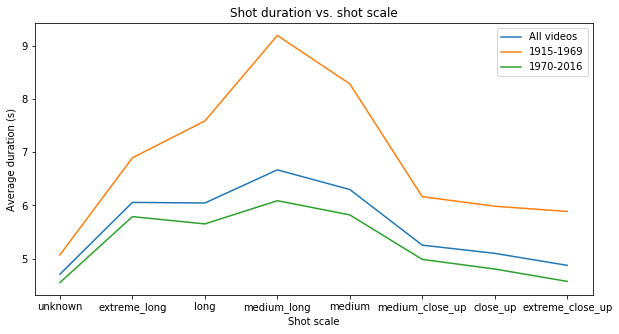

In [44]:
plot_duration_per_shot_scale(
    shot_scale_labels,
    [
        shot_lengths_per_bin_all_videos,
        shot_lengths_per_bin_1915_to_1969,
        shot_lengths_per_bin_1970_to_2016
    ],
    [
        'All videos',
        '1915-1969',
        '1970-2016',
    ], 'Shot duration vs. shot scale')

## Brightness

How has the brightness of movies changed over the years? What about over the course of individual movies?

### Changes in brightness over the years 

In [45]:
# Load frames that have non-null brightness values from the database
frames_qs = Frame.objects.filter(
    video__in=all_videos
).exclude(brightness__isnull=True).annotate(
    min_frame=F('number'),
    max_frame=F('number'),
    video_id=F('video_id')
).all()
num_frames = frames_qs.count()
brightness = VideoIntervalCollection.from_django_qs(
    frames_qs,
    with_payload=lambda frame: frame.brightness,
    progress=True,
    total=num_frames
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10798252/10798252 [03:13<00:00, 55722.85it/s]


In [46]:
def avg_brightness(intervallist):
    return np.mean([intrvl.payload for intrvl in intervallist.get_intervals()])

In [47]:
videos_with_avg_brightness = [
    (Video.objects.get(id=video_id), avg_brightness(brightness.get_intervallist(video_id)))
    for video_id in list(brightness.get_allintervals().keys())
]

In [48]:
def plot_avg_brightness_by_year(videos_with_avg_brightness, min_year=None):
    data = sorted([(v.year, people_per_frame) for v, people_per_frame in videos_with_avg_brightness])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    x = [d[0] for d in data]
    y = [d[1] for d in data]
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Brightness per Film (0-255 scale)')
    ax.set_title('Average brightness by year')
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.show()

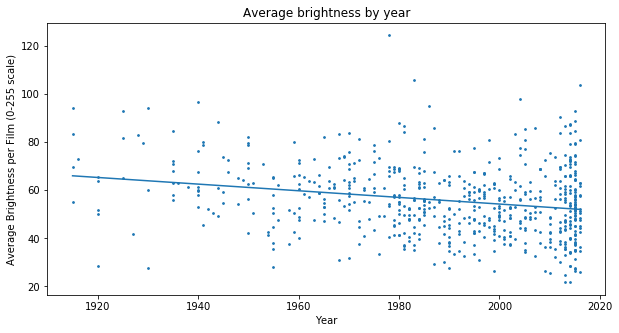

In [49]:
plot_avg_brightness_by_year(videos_with_avg_brightness)

### Changes in brightness within movies (narrative structure)

In [50]:
def compute_brightness_per_bin(videos):
    bucket_proportions = [[] for i in range(0, 100)]
    
    # Keep track of total brightness of entire dataset to normalize later
    total_brightness = 0.
    total_videos = 0.
    for video in tqdm(videos):
        # Get all the frames with non-null brightness values
        frames = list(Frame.objects.filter(video_id=video.id).exclude(brightness__isnull=True).order_by('number').all())

        divider = video.num_frames / 100.
        bin_num = 0

        # Keep track of total brightness to normalize this film later
        film_brightness = 0.
        num_frames = len(frames)
        
        if num_frames == 0:
            continue
        
        # Keep track of average brightness in each bin
        bin_brightness = 0.
        num_frames_in_bin = 0.
        for frame in frames:
            if frame.number > video.num_frames:
                break
            if frame.number <= (bin_num + 1.) * divider:
                num_frames_in_bin += 1
                bin_brightness += frame.brightness
            else:
                bucket_proportions[bin_num].append(bin_brightness / num_frames_in_bin)
                bin_num += 1
                num_frames_in_bin = 1.
                bin_brightness = frame.brightness
            film_brightness += frame.brightness
        bucket_proportions[bin_num].append(bin_brightness / num_frames_in_bin)
        
        # Update brightness of entire dataset
        film_brightness = film_brightness / num_frames
        total_brightness += film_brightness
        total_videos += 1
        
        # Normalize bucket values
        for i in range(0, 100):
            bucket_proportions[i][-1] *= 1 / film_brightness
    
    normalized_brightness_per_bin = [
        np.mean(proportions) * (total_brightness / total_videos)
        for proportions in bucket_proportions
    ]
    
    return normalized_brightness_per_bin

In [51]:
def plot_brightness_per_bin(data, title, polynomial_degree=6):
    x = [(i + 0.5) / 100. for i in range(0, 100)]
    y = data
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Proportion of movie')
    ax.set_ylabel('Average Brightness (0-255 scale)')
    ax.set_title(title)
    ax.set_xlim(0, 1)
    
    data_ymax = np.max(y)
    graph_ymax = data_ymax + 20
    ax.set_ylim(top=graph_ymax)
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polynomial_degree))(np.unique(x)))
    
    ax.axvline(x=0.25, color='k')
    ax.axvline(x=0.5, color='k')
    ax.axvline(x=0.75, color='k')
    # Line for credits, maybe?
    # ax.axvline(x=0.95, color='k')
    
    text_y = data_ymax + 10
    ax.text(x=0.1, y=text_y, s='Setup')
    ax.text(x=0.32, y=text_y, s='Complication')
    ax.text(x=0.57, y=text_y, s='Development')
    ax.text(x=0.85, y=text_y, s='Climax')
    
    plt.show()

In [52]:
brightness_all_videos = compute_brightness_per_bin(all_videos)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [03:10<00:00,  3.70it/s]


In [53]:
brightness_1915_to_1959 = compute_brightness_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1915,
        year__lte=1959
    ).order_by('id').all()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:15<00:00,  5.21it/s]


In [54]:
brightness_1960_to_1985 = compute_brightness_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1960,
        year__lte=1985
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:49<00:00,  4.23it/s]


In [55]:
brightness_1986_to_2016 = compute_brightness_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1986,
        year__lte=2016
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [01:37<00:00,  4.04it/s]


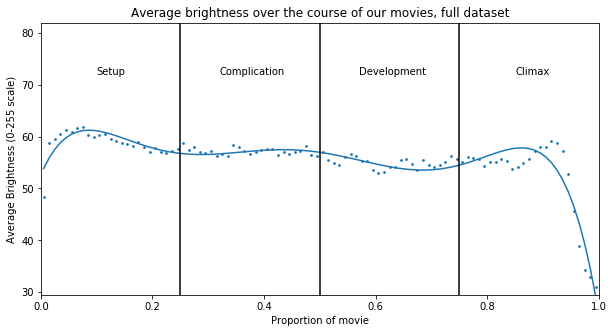

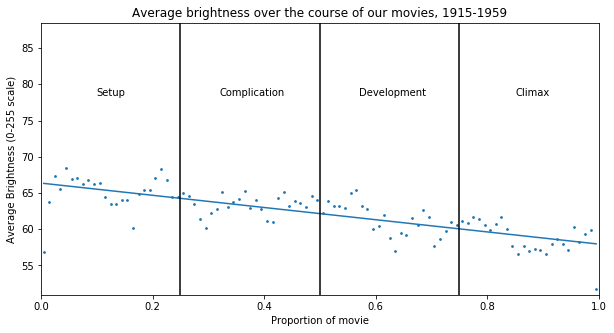

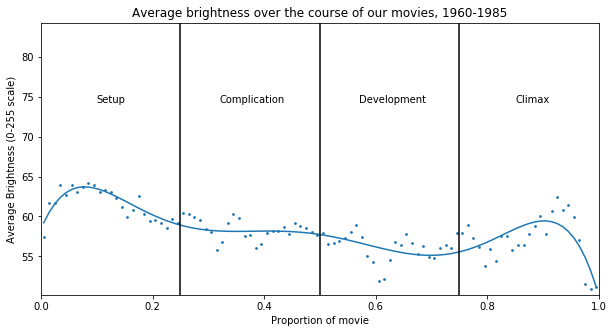

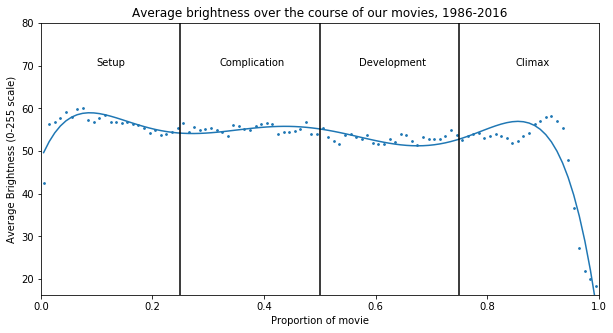

In [56]:
plot_brightness_per_bin(
    brightness_all_videos,
    'Average brightness over the course of our movies, full dataset',
    polynomial_degree=6
)
plot_brightness_per_bin(
    brightness_1915_to_1959,
    'Average brightness over the course of our movies, 1915-1959',
    polynomial_degree=1
)
plot_brightness_per_bin(
    brightness_1960_to_1985,
    'Average brightness over the course of our movies, 1960-1985',
    polynomial_degree=6
)
plot_brightness_per_bin(
    brightness_1986_to_2016,
    'Average brightness over the course of our movies, 1986-2016',
    polynomial_degree=6
)

## Saturation

How has the saturation of movies changed over the years? What about over the course of individual movies?

### Changes in saturation over the years

In [57]:
# Takes about four minutes to run!
# Load frames that have non-null saturation values from the database
frames_saturation_qs = Frame.objects.filter(
    video__in=all_videos
).exclude(saturation__isnull=True).annotate(
    min_frame=F('number'),
    max_frame=F('number'),
    video_id=F('video_id')
).all()
num_frames_saturation = frames_saturation_qs.count()
saturation = VideoIntervalCollection.from_django_qs(
    frames_saturation_qs,
    with_payload=lambda frame: frame.saturation,
    progress=True,
    total=num_frames_saturation
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10798252/10798252 [03:14<00:00, 55605.97it/s]


In [58]:
def avg_saturation(intervallist):
    return np.mean([intrvl.payload for intrvl in intervallist.get_intervals()])

In [59]:
videos_with_avg_saturation = [
    (Video.objects.get(id=video_id), avg_saturation(saturation.get_intervallist(video_id)))
    for video_id in list(saturation.get_allintervals().keys())
]

In [60]:
def plot_avg_saturation_by_year(videos_with_avg_saturation, min_year=None):
    data = sorted([(v.year, people_per_frame) for v, people_per_frame in videos_with_avg_saturation])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    x = [d[0] for d in data]
    y = [d[1] for d in data]
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Saturation per Film (0-255 scale)')
    ax.set_title('Average saturation by year')
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.show()

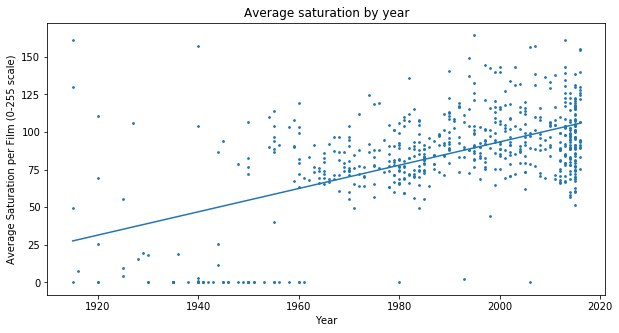

In [61]:
plot_avg_saturation_by_year(videos_with_avg_saturation)

In [62]:
# What are the movies with highest saturation?
sorted([
    (v.title, v.year, avg_saturation)
    for v, avg_saturation in videos_with_avg_saturation if avg_saturation > 150
], key=lambda tup: (tup[1], tup[0], tup[2]))

[('Alice in Wonderland', 1915, 161.14869766617497),
 ('Fantasia', 1940, 157.09202218546335),
 ('Pocahontas', 1995, 164.32966297546207),
 ('Mission: Impossible III', 2006, 156.73296737475786),
 ("Ocean's Thirteen", 2007, 157.29852791256113),
 ('The Colony', 2013, 161.21171225416273),
 ('Independence Day: Resurgence', 2016, 155.58713669701712),
 ('Kubo and the Two Strings', 2016, 154.43424536296874)]

In [63]:
# What are the movies with lowest saturation?
sorted([
    (v.title, v.year, avg_saturation)
    for v, avg_saturation in videos_with_avg_saturation if avg_saturation < 10
], key=lambda tup: (tup[1], tup[0], tup[2]))

[('Children of Eve', 1915, 0.03911031495160427),
 ('Civilization', 1916, 7.8170289419265115),
 ('The Flapper', 1920, 0.0),
 ('Why Change Your Wife?', 1920, 0.0),
 ('Go West', 1925, 9.459338239167971),
 ('The Wizard of Oz', 1925, 4.093533973149607),
 ('Abraham Lincoln', 1930, 0.0),
 ('Liliom', 1930, 0.0),
 ('A Night at the Opera', 1935, 0.0),
 ('A Tale of Two Cities', 1935, 0.0),
 ('Anna Karenina', 1935, 0.0),
 ('Captain Blood', 1935, 0.0005606700513758343),
 ('Mutiny on the Bounty', 1935, 3.499302758732998e-05),
 ('The 39 Steps', 1935, 0.0),
 ('Top Hat', 1935, 0.0),
 ('The Lady Vanishes', 1938, 0.0),
 ('Foreign Correspondent', 1940, 0.0),
 ('His Girl Friday', 1940, 0.7160420298617267),
 ('Rebecca', 1940, 0.0620985633647468),
 ('The Grapes of Wrath', 1940, 0.0),
 ('The Great Dictator', 1940, 0.0),
 ('The Philadelphia Story', 1940, 2.7251904587004225),
 ('Mr. & Mrs. Smith', 1941, 0.0),
 ('Suspicion', 1941, 0.0),
 ('The Maltese Falcon', 1941, 0.0),
 ('Saboteur', 1942, 0.031497412328133335

### Changes in saturation within movies (narrative structure?)

In [64]:
def compute_saturation_per_bin(videos):
    bucket_proportions = [[] for i in range(0, 100)]
    
    # Keep track of total saturation of entire dataset to normalize later
    total_saturation = 0.
    total_videos = 0.
    for video in tqdm(videos):
        # Get all the frames with non-null saturation values
        frames = list(Frame.objects.filter(video_id=video.id).exclude(
            saturation__isnull=True).order_by('number').all())

        divider = video.num_frames / 100.
        bin_num = 0

        # Keep track of total saturation to normalize this film later
        film_saturation = 0.
        num_frames = len(frames)
        
        if num_frames == 0:
            continue
        
        # Keep track of average saturation in each bin
        bin_saturation = 0.
        num_frames_in_bin = 0.
        for frame in frames:
            if frame.number > video.num_frames:
                break
            if frame.number <= (bin_num + 1.) * divider:
                num_frames_in_bin += 1
                bin_saturation += frame.saturation
            else:
                bucket_proportions[bin_num].append(bin_saturation / num_frames_in_bin)
                bin_num += 1
                num_frames_in_bin = 1.
                bin_saturation = frame.saturation
            film_saturation += frame.saturation
        bucket_proportions[bin_num].append(bin_saturation / num_frames_in_bin)
        
        # Update saturation of entire dataset
        film_saturation = film_saturation / num_frames
        total_saturation += film_saturation
        total_videos += 1
        
        # Normalize bucket values
        for i in range(0, 100):
            if film_saturation > 0:
                bucket_proportions[i][-1] *= 1 / film_saturation
    
    normalized_saturation_per_bin = [
        np.mean(proportions) * (total_saturation / total_videos)
        for proportions in bucket_proportions
    ]
    
    return normalized_saturation_per_bin

In [65]:
def plot_saturation_per_bin(data, title, polynomial_degree=6):
    x = [(i + 0.5) / 100. for i in range(0, 100)]
    y = data
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Proportion of movie')
    ax.set_ylabel('Average Saturation (0-255 scale)')
    ax.set_title(title)
    ax.set_xlim(0, 1)
    
    data_ymax = np.max(y)
    graph_ymax = data_ymax + 20
    ax.set_ylim(top=graph_ymax)
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polynomial_degree))(np.unique(x)))
    
    ax.axvline(x=0.25, color='k')
    ax.axvline(x=0.5, color='k')
    ax.axvline(x=0.75, color='k')
    # Line for credits, maybe?
    # ax.axvline(x=0.95, color='k')
    
    text_y = data_ymax + 10
    ax.text(x=0.1, y=text_y, s='Setup')
    ax.text(x=0.32, y=text_y, s='Complication')
    ax.text(x=0.57, y=text_y, s='Development')
    ax.text(x=0.85, y=text_y, s='Climax')
    
    plt.show()

In [66]:
saturation_all_videos = compute_saturation_per_bin(all_videos)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [02:40<00:00,  4.22it/s]


In [67]:
saturation_1915_to_1959 = compute_saturation_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1915,
        year__lte=1959
    ).order_by('id').all()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:15<00:00,  5.01it/s]


In [68]:
saturation_1960_to_1985 = compute_saturation_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1960,
        year__lte=1985
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:56<00:00,  4.04it/s]


In [69]:
saturation_1986_to_2016 = compute_saturation_per_bin(
    Video.objects.filter(
        decode_errors=False,
        year__gte=1986,
        year__lte=2016
    ).order_by('id').all()
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [01:29<00:00,  3.99it/s]


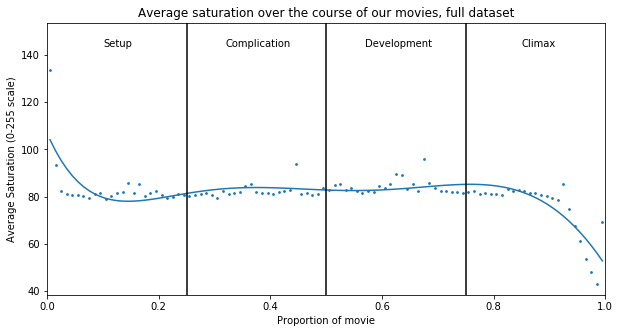

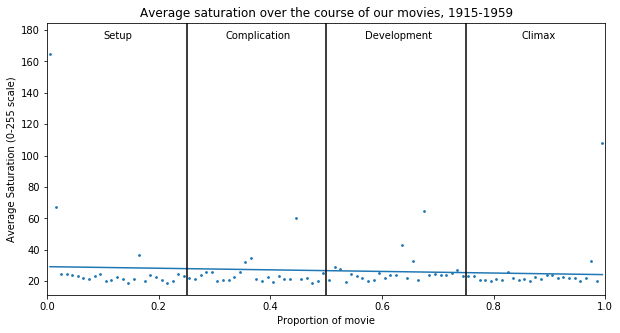

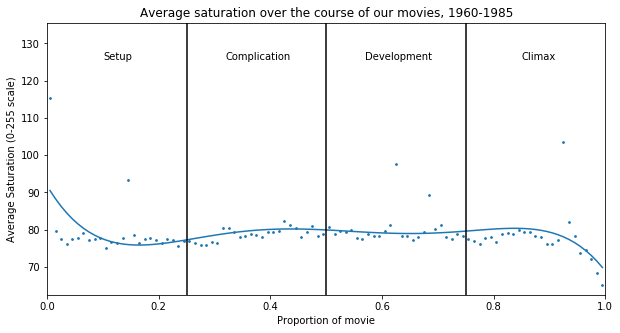

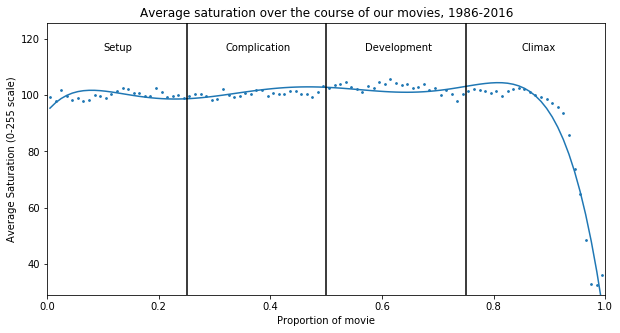

In [70]:
plot_saturation_per_bin(
    saturation_all_videos,
    'Average saturation over the course of our movies, full dataset',
    polynomial_degree=6
)
plot_saturation_per_bin(
    saturation_1915_to_1959,
    'Average saturation over the course of our movies, 1915-1959',
    polynomial_degree=1
)
plot_saturation_per_bin(
    saturation_1960_to_1985,
    'Average saturation over the course of our movies, 1960-1985',
    polynomial_degree=6
)
plot_saturation_per_bin(
    saturation_1986_to_2016,
    'Average saturation over the course of our movies, 1986-2016',
    polynomial_degree=6
)

## Mean Number of People

### Mean number of people per frame over the years
We can use either face detection or pose detection to get the mean number of people per frame.

In [71]:
# This takes about five minutes to run!
faces_qs = Face.objects.filter(frame__video__in=all_videos).annotate(
    min_frame=F('frame__number'),
    max_frame=F('frame__number'),
    video_id=F('frame__video_id')
).all()
total_faces = faces_qs.count()
print(total_faces)
face_counts = VideoIntervalCollection.from_django_qs(
    faces_qs,
    with_payload=lambda row: row.probability,
    progress=True,
    total=total_faces
).coalesce(payload_merge_op=payload_plus)

  0%|                                                                                                                                                                                                            | 0/8648762 [00:00<?, ?it/s]

8648762


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8648762/8648762 [03:28<00:00, 41434.31it/s]


In [26]:
# This takes about seven minutes to run!
pose_qs = PoseMeta.objects.filter(frame__video__in=all_videos).annotate(
    min_frame=F('frame__number'),
    max_frame=F('frame__number'),
    video_id=F('frame__video_id')
)
total_poses = pose_qs.count()
print(total_poses)
pose_counts = VideoIntervalCollection.from_django_qs(
    pose_qs,
    with_payload=lambda row: 1,
    progress=True,
    total=total_poses
).coalesce(payload_merge_op=payload_plus)

  0%|                                                                                                                                                                                                           | 0/18088675 [00:00<?, ?it/s]

18088675


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18088675/18088675 [04:07<00:00, 73046.20it/s]


In [73]:
def avg_number_of_people(intervallist, truncate=False):
    people_per_frame = [
        intrvl.payload if not truncate else min(5, intrvl.payload)
        for intrvl in intervallist.get_intervals()
    ]
    return np.mean(people_per_frame)

In [74]:
videos_with_avg_people_per_frame_faces = [
    (Video.objects.get(id=video_id), avg_number_of_people(face_counts.get_intervallist(video_id)))
    for video_id in tqdm(list(face_counts.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:02<00:00, 217.08it/s]


In [75]:
videos_with_avg_people_per_frame_poses = [
    (Video.objects.get(id=video_id), avg_number_of_people(pose_counts.get_intervallist(video_id)))
    for video_id in tqdm(list(pose_counts.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:02<00:00, 244.47it/s]


In [76]:
videos_with_avg_people_per_frame_faces_truncated = [
    (Video.objects.get(id=video_id), avg_number_of_people(face_counts.get_intervallist(video_id), truncate=True))
    for video_id in tqdm(list(face_counts.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:05<00:00, 126.34it/s]


In [77]:
videos_with_avg_people_per_frame_poses_truncated = [
    (Video.objects.get(id=video_id), avg_number_of_people(pose_counts.get_intervallist(video_id), truncate=True))
    for video_id in tqdm(list(pose_counts.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:04<00:00, 150.82it/s]


In [78]:
def plot_avg_people_per_frame_by_year(videos_with_avg_people_per_frame, title, min_year=None):
    data = sorted([(v.year, people_per_frame) for v, people_per_frame in videos_with_avg_people_per_frame])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    x = [d[0] for d in data]
    y = [d[1] for d in data]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(x, y, s=3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average People per Frame')
    ax.set_title(title)
    
    #ax.set_yscale('symlog')
    
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.show()

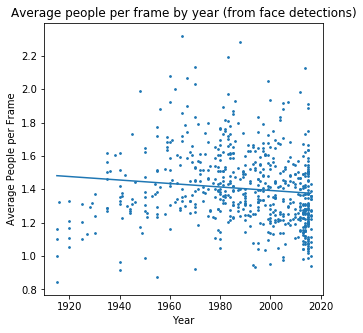

In [79]:
plot_avg_people_per_frame_by_year(videos_with_avg_people_per_frame_faces,
                                  'Average people per frame by year (from face detections)')

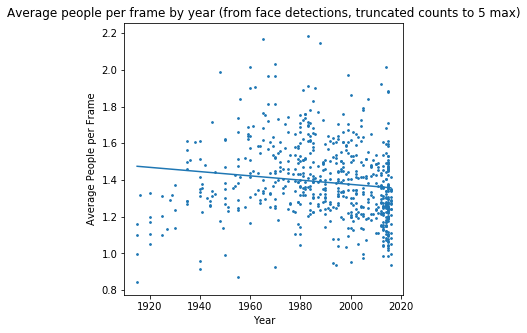

In [80]:
plot_avg_people_per_frame_by_year(videos_with_avg_people_per_frame_faces_truncated,
                                  'Average people per frame by year (from face detections, truncated counts to 5 max)')

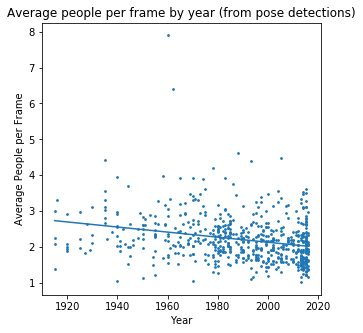

In [81]:
plot_avg_people_per_frame_by_year(videos_with_avg_people_per_frame_poses,
                                  'Average people per frame by year (from pose detections)')

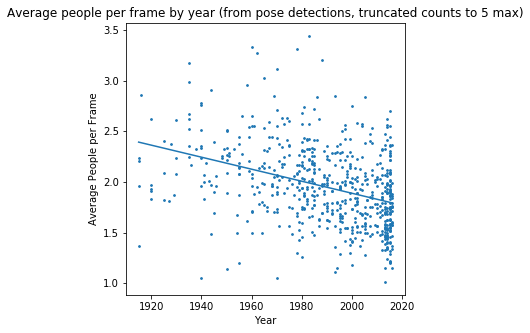

In [82]:
plot_avg_people_per_frame_by_year(videos_with_avg_people_per_frame_poses_truncated,
                                  'Average people per frame by year (from pose detections, truncated counts to 5 max)')

### Distribution of number of people per frame

Let's look at the distribution of number of people per frame - what proportion of frames have 0 people, 1 person, 2 people, up to 5+ people?

In [83]:
def distribution_of_people_per_frame(person_counts):
    bucket_proportions = [0. for i in range(0, 6)]
    total_videos = 0.
    for video_id in list(person_counts.get_allintervals().keys()):
        bucket_counts = [0. for i in range(0, 6)]
        total_frames = 0.
        for intrvl in person_counts.get_intervallist(video_id).get_intervals():
            if intrvl.get_start() % 12 != 0:
                continue
            count = min(round(intrvl.payload), 5)
            bucket_counts[count] += 1
            total_frames += 1
        for i in range(0, 6):
            bucket_proportions[i] += bucket_counts[i] / total_frames
        total_videos += 1
    return [i / total_videos for i in bucket_proportions]

In [84]:
def graph_person_count_distribution(person_distribution_list, labels, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    for distribution, label in zip(person_distribution_list, labels):
        x = ['0', '1', '2', '3', '4', '5+']
        y = distribution
        ax.plot(x, y, label=label)
        
        ax.legend()
        
    ax.set_xlabel('Number of people in frame')
    ax.set_ylabel('Proportion of frames')
    ax.set_title(title)
    
    plt.show()

In [85]:
person_distribution_all_videos = distribution_of_people_per_frame(face_counts)

In [86]:
person_distribution_1915_to_1969 = distribution_of_people_per_frame(
    VideoIntervalCollection(
        {
            video_id: face_counts.get_intervallist(video_id)
            for video_id in list(face_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year <= 1969
        }
    )
)

In [87]:
person_distribution_1970_to_2016 = distribution_of_people_per_frame(
    VideoIntervalCollection(
        {
            video_id: face_counts.get_intervallist(video_id)
            for video_id in list(face_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year >= 1970
        }
    )
)

In [88]:
person_distribution_all_videos_poses = distribution_of_people_per_frame(pose_counts)

In [89]:
person_distribution_1915_to_1969_poses = distribution_of_people_per_frame(
    VideoIntervalCollection(
        {
            video_id: pose_counts.get_intervallist(video_id)
            for video_id in list(pose_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year <= 1969
        }
    )
)

In [90]:
person_distribution_1970_to_2016_poses = distribution_of_people_per_frame(
    VideoIntervalCollection(
        {
            video_id: pose_counts.get_intervallist(video_id)
            for video_id in list(pose_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year >= 1970
        }
    )
)

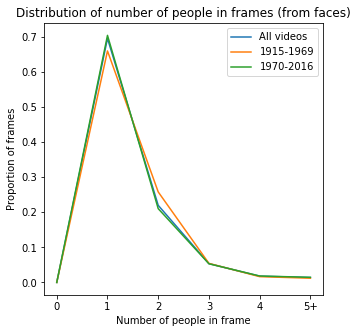

In [91]:
graph_person_count_distribution(
    [
        person_distribution_all_videos,
        person_distribution_1915_to_1969,
        person_distribution_1970_to_2016
    ],
    [
        'All videos',
        '1915-1969',
        '1970-2016'
    ],
    'Distribution of number of people in frames (from faces)'
)

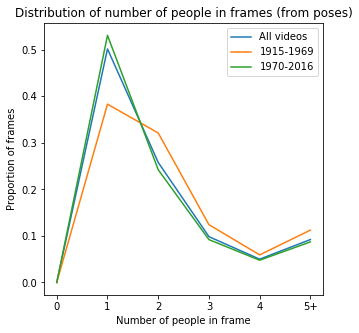

In [92]:
graph_person_count_distribution(
    [
        person_distribution_all_videos_poses,
        person_distribution_1915_to_1969_poses,
        person_distribution_1970_to_2016_poses
    ],
    [
        'All videos',
        '1915-1969',
        '1970-2016'
    ],
    'Distribution of number of people in frames (from poses)'
)

## Number of people in a shot vs shot duration

In [29]:
# First, load all the shots into Rekall
shots_qs = Shot.objects.filter(
    video__in=all_videos,
    labeler=Labeler.objects.get(name='shot-hsvhist-face')
).all()
num_shots = shots_qs.count()
shots = VideoIntervalCollection.from_django_qs(
    shots_qs,
    progress=True,
    total=num_shots
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 874572/874572 [00:09<00:00, 95464.71it/s]


In [30]:
# Next, overlap the shots with per-frame counts of people so that the payload
#   for each shot is a list of all the shot scales in the shot
# Finally, take the max of the counts

shots_with_pose_counts = shots.merge(
    pose_counts,
    payload_merge_op=lambda shot_id, count: [count],
    predicate=overlaps(),
    working_window=1
).coalesce(
    payload_merge_op=payload_plus
).map(
    lambda shot_interval: (shot_interval.get_start(), shot_interval.get_end(),
                          max(shot_interval.get_payload()))
).set_union(
    shots.map(lambda intrvl: (intrvl.get_start(), intrvl.get_end(), 0))
).coalesce(
    payload_merge_op=lambda p1, p2: max(p1, p2)
)

In [81]:
# Compute normalized shot durations for number of people
def compute_pose_count_normalized_duration(shots_with_pose_counts):
    bucket_proportions = [[] for i in range(0, 6)]
    
    average_shot_duration_data = 0.
    total_videos = 0.
    
    for video_id in shots_with_pose_counts.get_allintervals():
        bucket_proportions_for_video = [[] for i in range(0, 6)]
        
        shots_in_video = shots_with_pose_counts.get_intervallist(video_id)
        
        video = Video.objects.get(id=video_id)
        
        for intrvl in shots_in_video.get_intervals():
            count = min(round(intrvl.payload), 5)
            
            bucket_proportions_for_video[count].append(
                intrvl.get_end()-intrvl.get_start()
            )
        
        avg_shot_duration_for_video = float(video.num_frames) / shots_in_video.size()
        
        for i in range(6):
            if len(bucket_proportions_for_video[i]) > 0:
                bucket_proportions[i].append(
                    np.mean(bucket_proportions_for_video[i]) / avg_shot_duration_for_video
                )
        
        average_shot_duration_data += avg_shot_duration_for_video / video.fps
        total_videos += 1
    
    average_shot_duration_data /= total_videos
    
    normalized_proportions = [
        np.mean(bucket_proportions[i]) * average_shot_duration_data
        for i in range(6)
    ]
    
    return normalized_proportions

In [103]:
def graph_pose_count_duration(count_duration_list, labels, title, filename=None):
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
    for distribution, label in zip(count_duration_list, labels):
        x = ['0', '1', '2', '3', '4', '5+']
        y = distribution
        ax.bar(x, y, label=label)
        
        ax.legend()
        
    ax.set_xlabel('Number of people in shot')
    ax.set_ylabel('Average shot duration')
    ax.set_title(title)
    
    if filename is not None:
        plt.savefig(filename)
    
    plt.show()

In [82]:
count_duration_all_videos = compute_pose_count_normalized_duration(shots_with_pose_counts)

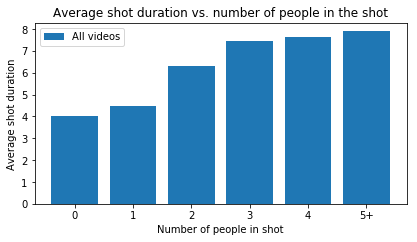

In [104]:
graph_pose_count_duration(
    [
        count_duration_all_videos,
    ],
    [
        'All videos',
    ],
    'Average shot duration vs. number of people in the shot',
    filename='shot_duration_vs_people_in_shot.pdf'
)

In [98]:
count_duration_1915_to_1969_poses = compute_pose_count_normalized_duration(
    VideoIntervalCollection(
        {
            video_id: shots_with_pose_counts.get_intervallist(video_id)
            for video_id in list(shots_with_pose_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year <= 1969
        }
    )
)

In [99]:
count_duration_1970_to_2016_poses = compute_pose_count_normalized_duration(
    VideoIntervalCollection(
        {
            video_id: shots_with_pose_counts.get_intervallist(video_id)
            for video_id in list(shots_with_pose_counts.get_allintervals().keys())
            if Video.objects.get(id=video_id).year > 1969
        }
    )
)

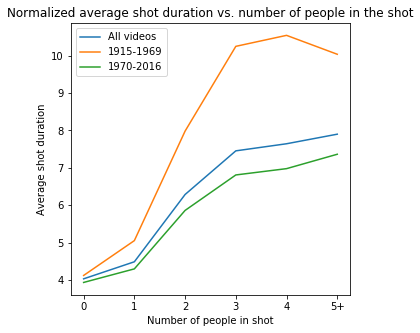

In [100]:
graph_pose_count_duration(
    [
        count_duration_all_videos,
        count_duration_1915_to_1969_poses,
        count_duration_1970_to_2016_poses
    ],
    [
        'All videos',
        '1915-1969',
        '1970-2016'
    ],
    'Normalized average shot duration vs. number of people in the shot')

In [27]:
def avg_number_of_people(intervallist, truncate=False):
    people_per_shot = [
        intrvl.payload if not truncate else min(5, intrvl.payload)
        for intrvl in intervallist.get_intervals()
    ]
    return np.mean(people_per_shot)

In [95]:
videos_with_avg_people_per_shot_poses = [
    (Video.objects.get(id=video_id), avg_number_of_people(shots_with_pose_counts.get_intervallist(video_id), truncate=False))
    for video_id in tqdm(list(shots_with_pose_counts.get_allintervals().keys()))
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 633/633 [00:01<00:00, 473.38it/s]


In [88]:
def movingaverage(x, y, window_size):
    return [
        np.mean([y2 for x2, y2 in zip(x, y) if abs(x2-x1) <= window_size])
        for x1 in x
    ]

def plot_avg_people_per_shot_by_year(videos_with_avg_people_per_shot, title, min_year=None, filename=None):
    data = sorted([(v.year, people_per_shot) for v, people_per_shot in videos_with_avg_people_per_shot])
    if min_year is not None:
        data = [d for d in data if d[0] >= min_year]

    x = [d[0] for d in data]
    y = [d[1] for d in data]
    y_av = movingaverage(x, y, 10)
    
    fig, ax = plt.subplots(figsize=(6.666, 3.333))
    fig.set_size_inches(6.666, 3.333)
    ax.set_xticks(range(1915, 2016, 25))
    ax.scatter(x, y, s=3, color='k')
    ax.plot(x, y_av, color='r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Number of People per Shot')
    ax.set_title(title)
    
    #ax.set_yscale('symlog')
    
    #ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='r')
    
    if filename is not None:
        plt.savefig(filename)
    plt.show()

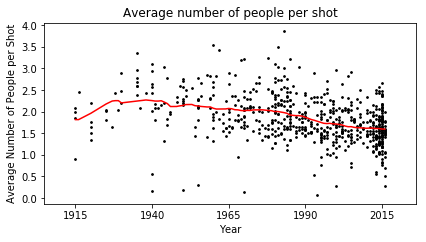

In [89]:
plot_avg_people_per_shot_by_year(videos_with_avg_people_per_shot_poses, 'Average number of people per shot',
                                filename='avg_people_per_shot.pdf')

In [99]:
[v.title for v, n in videos_with_avg_people_per_shot_poses if n > 8]

['Inherit the Wind', 'The Music Man']